###### Package Imports

In [3]:
#  NumPy and Pandas imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#  Reading time series
from pandas_datareader import data

#  Time stamps
import datetime as datetime

#  statistics package
from scipy import stats

#  Visualization (sns is a visualization library based on matplotlib)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

###### Extract Data

In [4]:
#  Stock tickers to retrieve historical index data
ticker_index_data = ['AMD', 'CSCO', 'INTC', 'MU', 'ORCL', 'QCOM']

#  Start and End retrieval dates
start = datetime.date(2017, 10, 10)
end = datetime.date(2019, 4, 10)

#  Closing price for each tech stock
stock_closing_prices = data.DataReader(ticker_index_data, 'yahoo', start, end)['Close']


# Part 2: Exploring the Data
------


## The Daily Return
------
To quantify the daily return, the **percentage change** is calculated as the percentage between the 
difference of the current and prior element divided by the prior element. 
Using this function on the 'Close' attribute gives the daily
return for the technology stock

In [6]:
#  The pandas DataFrame .pct_change() method returns the percentage change 
tech_daily_return = stock_closing_prices.pct_change()
 

### Describe Daily Return:
* **Sample Statistics Show** 
    
    * The average daily return over the observation period. 
             
             - All stocks averaged a positive daily return
    * The lowest daily return change (biggest price drop) and the maximum
      return (biggest price increase) for each stock. 
            
    * The volatility of each stock is described with standard deviation. 
            
            - AMD had daily returns with the most dispersion from its mean 
    
    * The descriptive statistics show CSCO, MU, and QCOM have more positive returns above the mean than below the mean
            
            -The mean must be skewed by negative returns.   

In [8]:
tech_daily_return.describe()


Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.002654,0.001453,0.001102,0.000476,0.000395,0.000272
std,0.039583,0.015026,0.019838,0.030250,0.014349,0.018691
min,-0.154454,-0.052529,-0.085890,-0.098708,-0.094321,-0.081633
25%,-0.016918,-0.005587,-0.008835,-0.016053,-0.005285,-0.008312
50%,0.002024,0.001663,0.000755,0.000892,0.001622,0.000609
75%,0.022670,0.008961,0.011899,0.018915,0.007929,0.009129
max,0.199481,0.055042,0.105519,0.113706,0.044507,0.127097


### Plot Daily Return:

In [ ]:
#  The Univariate Daily Return For Each Stock
tech_daily_return.plot(legend=True, title='Daily Returns', subplots=True, figsize=(18,10))


### Plot Correlation of Stock's Daily Returns:

In [9]:
#  The Correlation function for the Pair Plots
def corrfunc(x, y, **kws):
    r, _= stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.4f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)


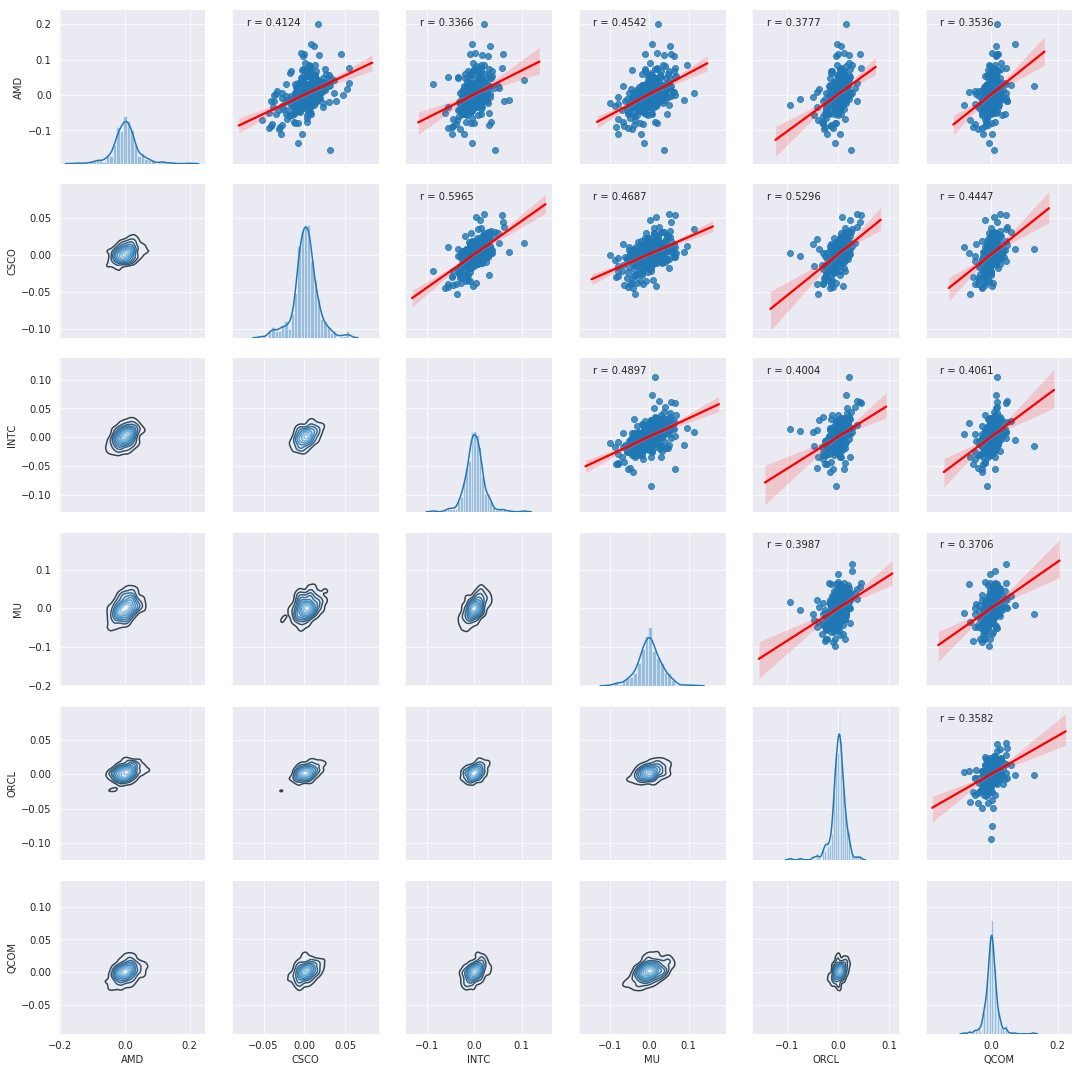

In [10]:
#  The diagonal is a univariate distribution
#  The upper diagonal shows the distribution and pearson coefficient
#  The lower diagonal is a Kernel Density Estimate
change_pairplot = sns.PairGrid(tech_daily_return.dropna())
change_pairplot.map_upper(sns.regplot, fit_reg=True, line_kws= {'color' : 'red'})
change_pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
change_pairplot.map_diag(sns.distplot)
change_pairplot.map_upper(corrfunc)


#### Correlation Matrix for Daily Returns: 

In [11]:
# Correlation Matrix of Daily Returns
daily_returns_corr = tech_daily_return.corr()
daily_returns_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.412,0.337,0.454,0.378,0.354
CSCO,0.412,1,0.597,0.469,0.53,0.445
INTC,0.337,0.597,1,0.49,0.4,0.406
MU,0.454,0.469,0.49,1,0.399,0.371
ORCL,0.378,0.53,0.4,0.399,1,0.358
QCOM,0.354,0.445,0.406,0.371,0.358,1


#### Cluster Map for Daily Returns:  

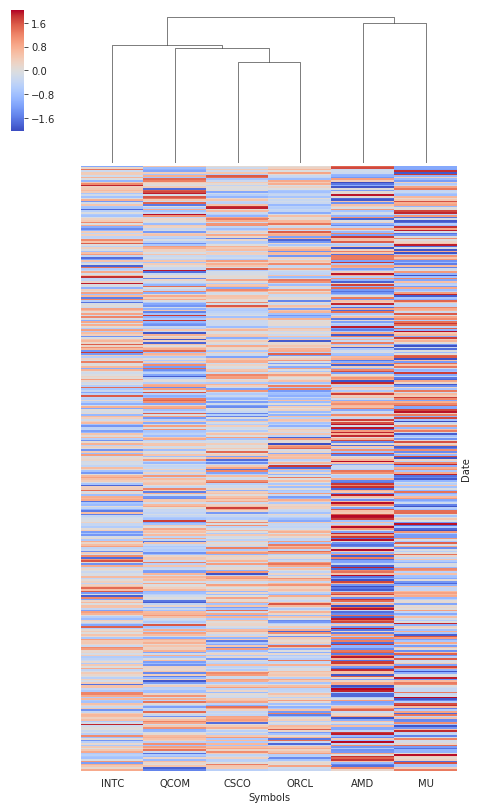

In [12]:
#  (1) Each row is normalized for it's daily return with a z-score
#  (2) The values are measured by correlation
#  (3) Dendrogram displays the results of the cluster analysis
graph_returns = sns.clustermap(tech_daily_return.dropna(), metric="correlation", method='single', 
                                z_score=0, row_cluster=False,
                                cmap='coolwarm',
                                yticklabels=False, figsize=(8,14))

#### Cluster Map for Monthly Returns:

In [14]:
#  Change Index From Daily to Monthly
tech_month_change = tech_daily_return
tech_month_change.index = pd.to_datetime(tech_month_change.index)
tech_month_change = tech_month_change.resample('M').last()

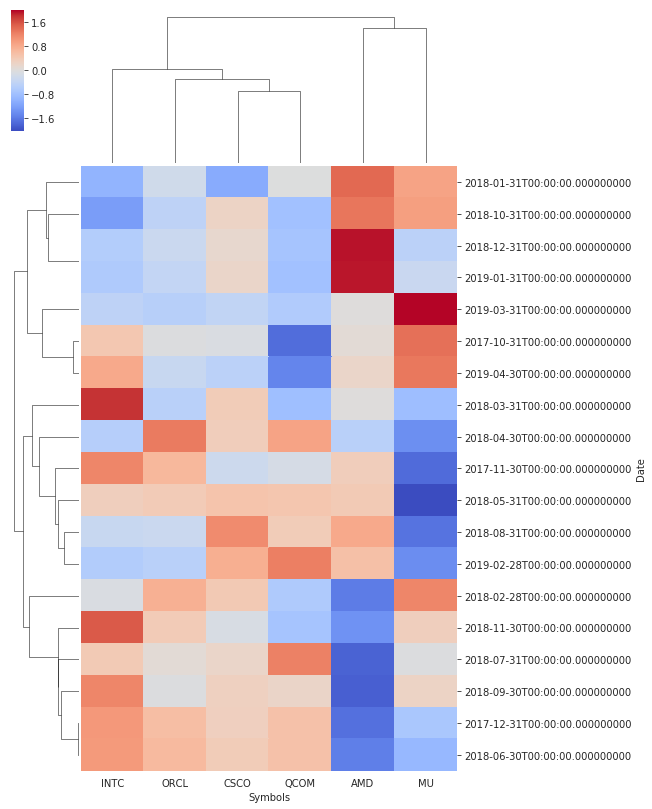

In [15]:
#  (1) Each row is normalized for it's daily return with a z-score
#  (2) The values are measured by correlation
#  (3) Dendrogram displays the results of the cluster analysis
graph_returns_month = sns.clustermap(tech_month_change.dropna(), metric="correlation", method='single', 
                                z_score=0, col_cluster=True,
                                cmap='coolwarm',
                               figsize=(8,14))

## Daily Cumulative Return
-------
The **Cumulative Return** for an investment is the aggregated amount it has gained or lost over
time.

In [16]:
#  The NumPy .cumprod() method returns the cumulative product of Daily Returns
tech_cum_daily_return = (1 + tech_daily_return).cumprod()

In [18]:
#  Each stock's cumulative return at end of observation period
tech_cum_daily_return.tail(1) 

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Date,,,,,,
2019-04-11,2.028467,1.657228,1.407314,1.007146,1.115744,1.037683


### Describe Daily Cumulative Returns:

In [19]:
tech_cum_daily_return.describe()

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,1.277916,1.310596,1.229466,1.081707,1.012597,1.117403
std,0.455390,0.140806,0.095777,0.175521,0.049425,0.114390
min,0.695620,0.991356,0.988398,0.691282,0.885501,0.917023
25%,0.862044,1.253651,1.161665,0.962601,0.979672,1.025989
50%,1.208029,1.312072,1.216141,1.041448,1.008919,1.089660
75%,1.611679,1.391952,1.307944,1.226536,1.045426,1.210321
max,2.388321,1.663785,1.439596,1.491663,1.132130,1.393911


### Plot Daily Cumulative Return:

In [ ]:
#  The Univariate Daily Cumulative Return
tech_cum_daily_return.plot(legend=True, title='Daily Cumulative Return', figsize=(10,12))

#### Plot Correlation of Stocks Daily Cumulative Return:

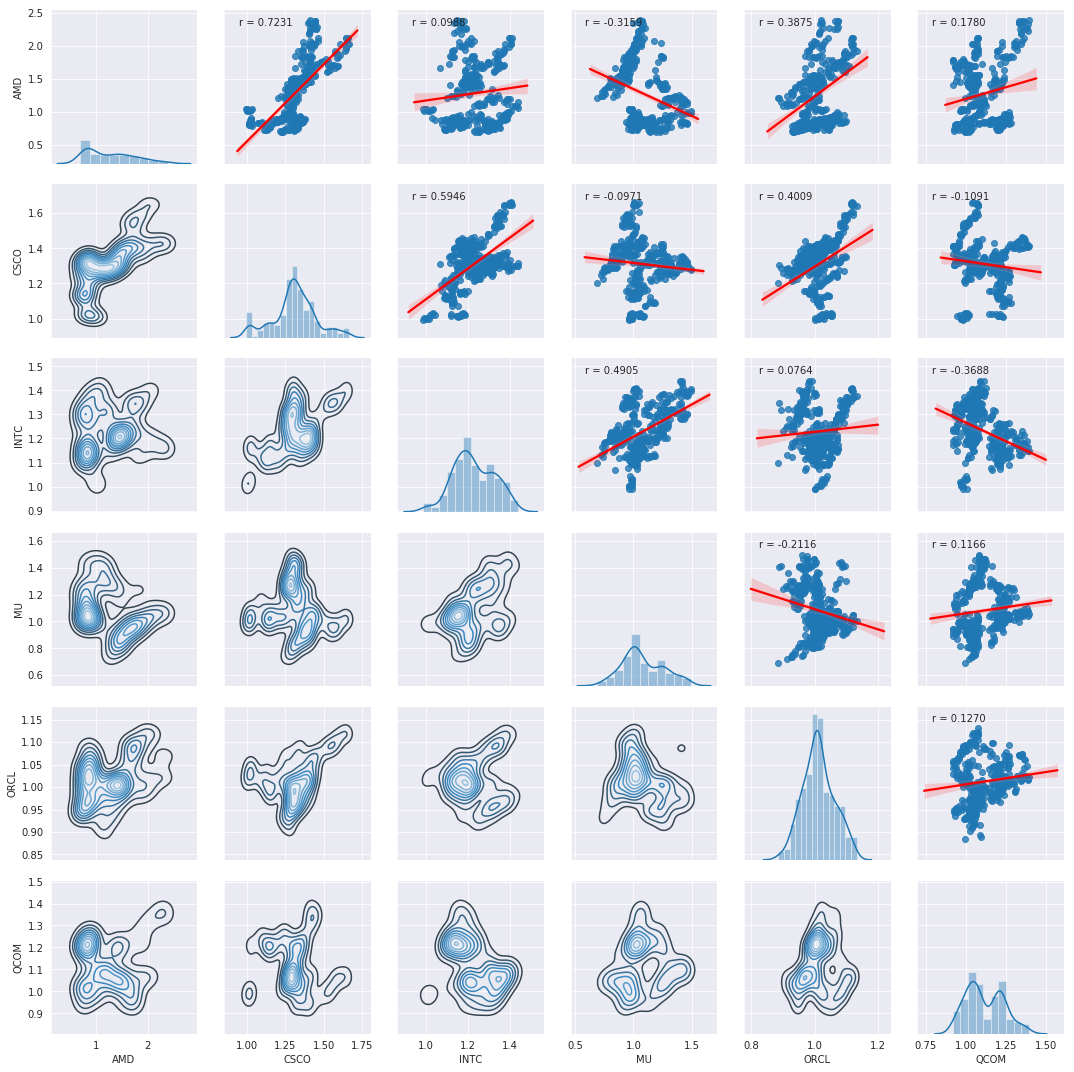

In [20]:
cum_returns_pairplot = sns.PairGrid(tech_cum_daily_return.dropna())
cum_returns_pairplot.map_upper(sns.regplot, fit_reg=True, line_kws= {'color' : 'red'})
cum_returns_pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
cum_returns_pairplot.map_diag(sns.distplot)
cum_returns_pairplot.map_upper(corrfunc)


#### Correlation Matrix for Cumulative Daily Returns:

In [21]:
# Correlation Matrix of Cumulative Daily Returns
cumu_returns_corr = tech_cum_daily_return.dropna().corr()
cumu_returns_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.723,0.0988,-0.316,0.387,0.178
CSCO,0.723,1,0.595,-0.0971,0.401,-0.109
INTC,0.0988,0.595,1,0.491,0.0764,-0.369
MU,-0.316,-0.0971,0.491,1,-0.212,0.117
ORCL,0.387,0.401,0.0764,-0.212,1,0.127
QCOM,0.178,-0.109,-0.369,0.117,0.127,1


#### Cluster Map for Cumulative Daily Returns:  

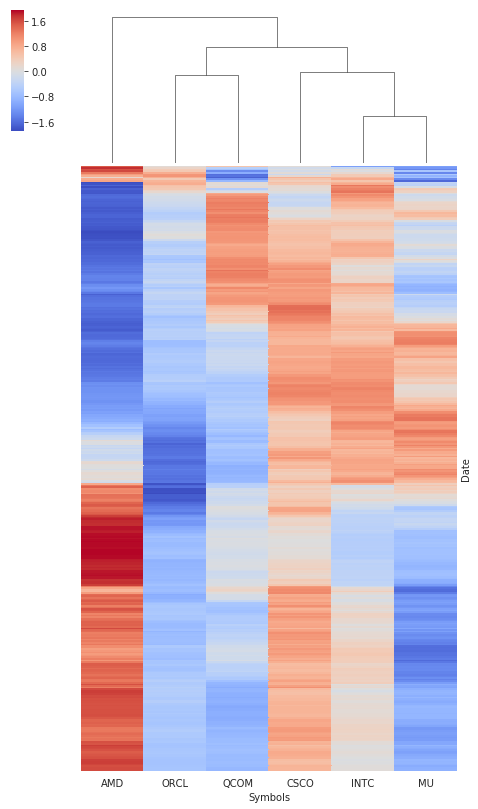

In [22]:
#  (1) Each row is normalized for it's daily return with a z-score
#  (2) The values are measured by correlation
#  (3) Dendrogram displays the results of the cluster analysis
graph_cum_returns = sns.clustermap(tech_cum_daily_return.dropna(), metric="correlation", method='single', 
                                z_score=0, row_cluster=False,
                                cmap='coolwarm',
                                yticklabels=False, figsize=(8,14))

## Measure Stock Daily Return Risk
-------
Risk can be quantified by comparing expected return with the standard deviation of returns. 
These values were found in the descriptive statistics for Daily Returns

In [ ]:
tech_daily_return.dropna()
quantify_risk = pd.DataFrame()
quantify_risk['Expected Return'] = tech_daily_return.mean()
quantify_risk['Risk'] = tech_daily_return.std()
quantify_risk

In [ ]:
sns.set_style("darkgrid")
sns.scatterplot(x='Expected Return', y='Risk', data=quantify_risk, 
                hue=ticker_index_data,
                legend='full',
                size=ticker_index_data,
                sizes=(70,70))

## Plot Correlation of Log Scaled Volume
--------

In [25]:
#  Get the log scaled trading volume data
log_volume = data.DataReader(ticker_index_data, 'yahoo', start, end)['Volume']
log_volume = np.log(log_volume)

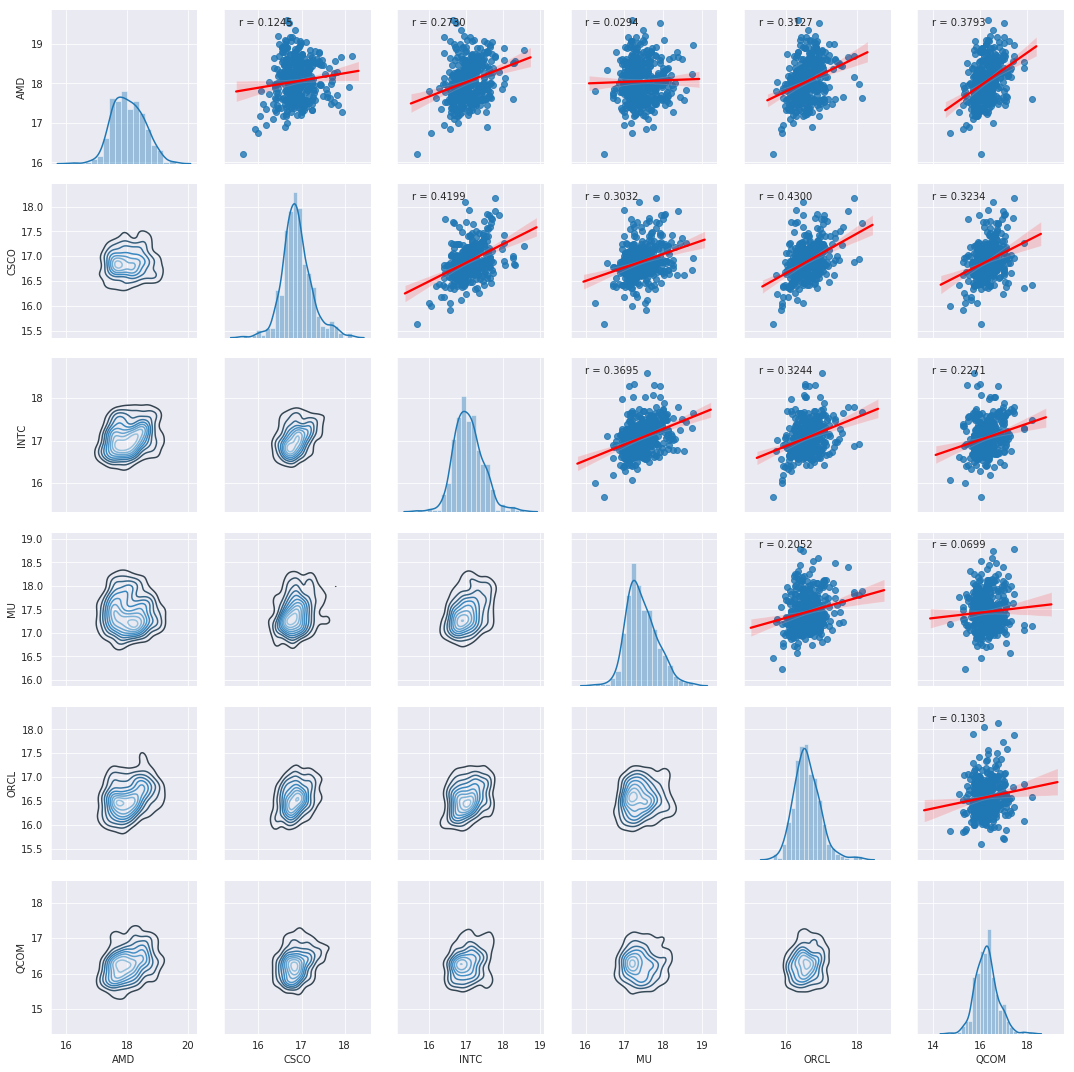

In [26]:
#  The diagonal is a univariate distribution
#  The upper diagonal shows the distribution and pearson coefficient
#  The lower diagonal is a Kernel Density Estimate
trade_volume_pairplot = sns.PairGrid(log_volume.dropna())
trade_volume_pairplot.map_upper(sns.regplot, fit_reg=True, line_kws= {'color' : 'red'})
trade_volume_pairplot.map_lower(sns.kdeplot, cmap="Blues_d")
trade_volume_pairplot.map_diag(sns.distplot)
trade_volume_pairplot.map_upper(corrfunc)

### Correlation Matrix for Trading Volume:

In [27]:
#  Trading Volume Correlation matrix
trading_volume_corr = log_volume.corr()
trading_volume_corr.style.background_gradient(cmap='coolwarm').set_precision(3)

Symbols,AMD,CSCO,INTC,MU,ORCL,QCOM
Symbols,,,,,,
AMD,1,0.125,0.273,0.0294,0.313,0.379
CSCO,0.125,1,0.42,0.303,0.43,0.323
INTC,0.273,0.42,1,0.37,0.324,0.227
MU,0.0294,0.303,0.37,1,0.205,0.0699
ORCL,0.313,0.43,0.324,0.205,1,0.13
QCOM,0.379,0.323,0.227,0.0699,0.13,1


### Cluster Map of Trading Volume: 

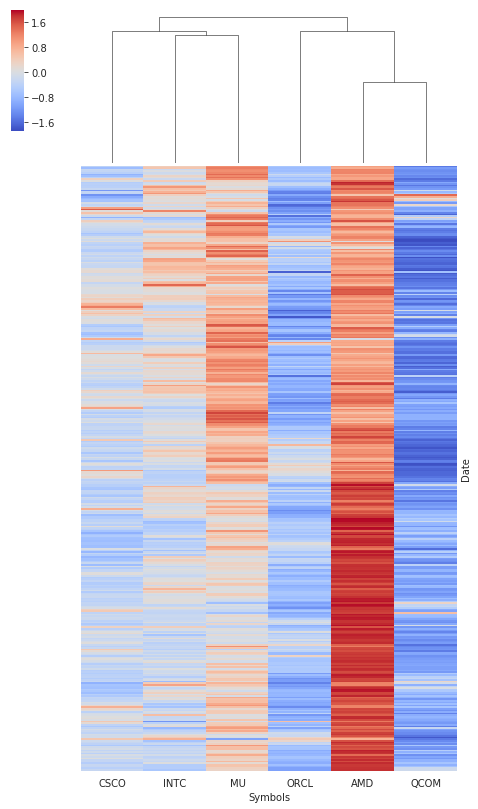

In [28]:
#  Each row is normalized for it's daily return with a z-score
#  The values are measured by correlation
#  Dendrogram displays the results of the cluster analysis
graph_volume = sns.clustermap(log_volume.dropna(), metric="correlation", method='single', 
                       z_score=0, row_cluster=False, 
                        cmap='coolwarm',
                        yticklabels=False, figsize=(8,14))
